In [100]:
import pandas as pd
from pathlib import Path
import os
import numpy as np

In [101]:

project_folder = "animal_clasificacion" 
if os.getcwd().endswith("/tf"):
    os.chdir(project_folder)

In [114]:
import logging, tensorflow as tf

tf.get_logger().propagate = False          # evita duplicados
for h in tf.get_logger().handlers:
    h.addFilter(lambda record: "png_io.cc" not in record.getMessage())


2025-06-18 01:43:34.001670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-18 01:43:34.001693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-18 01:43:34.002412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-18 01:43:34.006024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [102]:
BASE_DIR = Path().cwd()

IMG_DIRECTORY = BASE_DIR / 'raw-img'


animales_show = {}

cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    imagenes = list((IMG_DIRECTORY / folder).iterdir())
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        animales_show[folder] = imagenes

    

In [103]:
cantidad_fotos

{'mucca': 1866,
 'gallina': 3098,
 'elefante': 1446,
 'gatto': 1668,
 'ragno': 4821,
 'cane': 4863,
 'cavallo': 2623,
 'pecora': 1820,
 'scoiattolo': 1862,
 'farfalla': 2112}

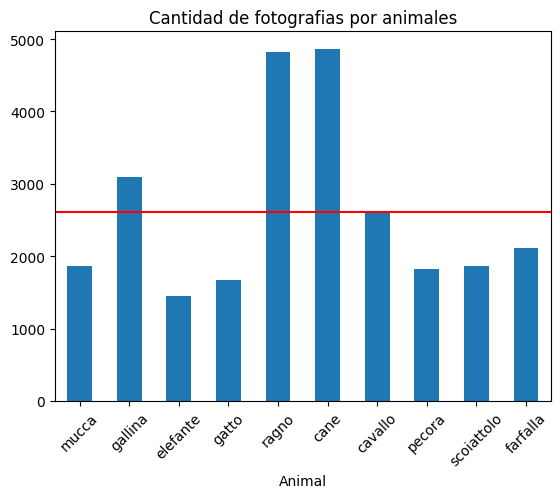

In [104]:
import matplotlib.pyplot as plt
df_totales = pd.DataFrame(list(cantidad_fotos.items()), columns=['Animal', 'Cuenta'])

df_totales.plot(kind='bar', x='Animal', y='Cuenta', legend=False)
plt.title('Cantidad de fotografias por animales')
plt.axhline(df_totales['Cuenta'].mean(), color='r')
plt.xticks(rotation=45)
plt.show()

In [105]:
new_data = {}

cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    imagenes = list((IMG_DIRECTORY / folder).iterdir())[:2000]
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        new_data[folder] = imagenes

    

In [106]:
cantidad_fotos

{'mucca': 1866,
 'gallina': 2000,
 'elefante': 1446,
 'gatto': 1668,
 'ragno': 2000,
 'cane': 2000,
 'cavallo': 2000,
 'pecora': 1820,
 'scoiattolo': 1862,
 'farfalla': 2000}

In [107]:
first_item = { key:new_data[key][0] for i, (key, value) in enumerate(new_data.items())}

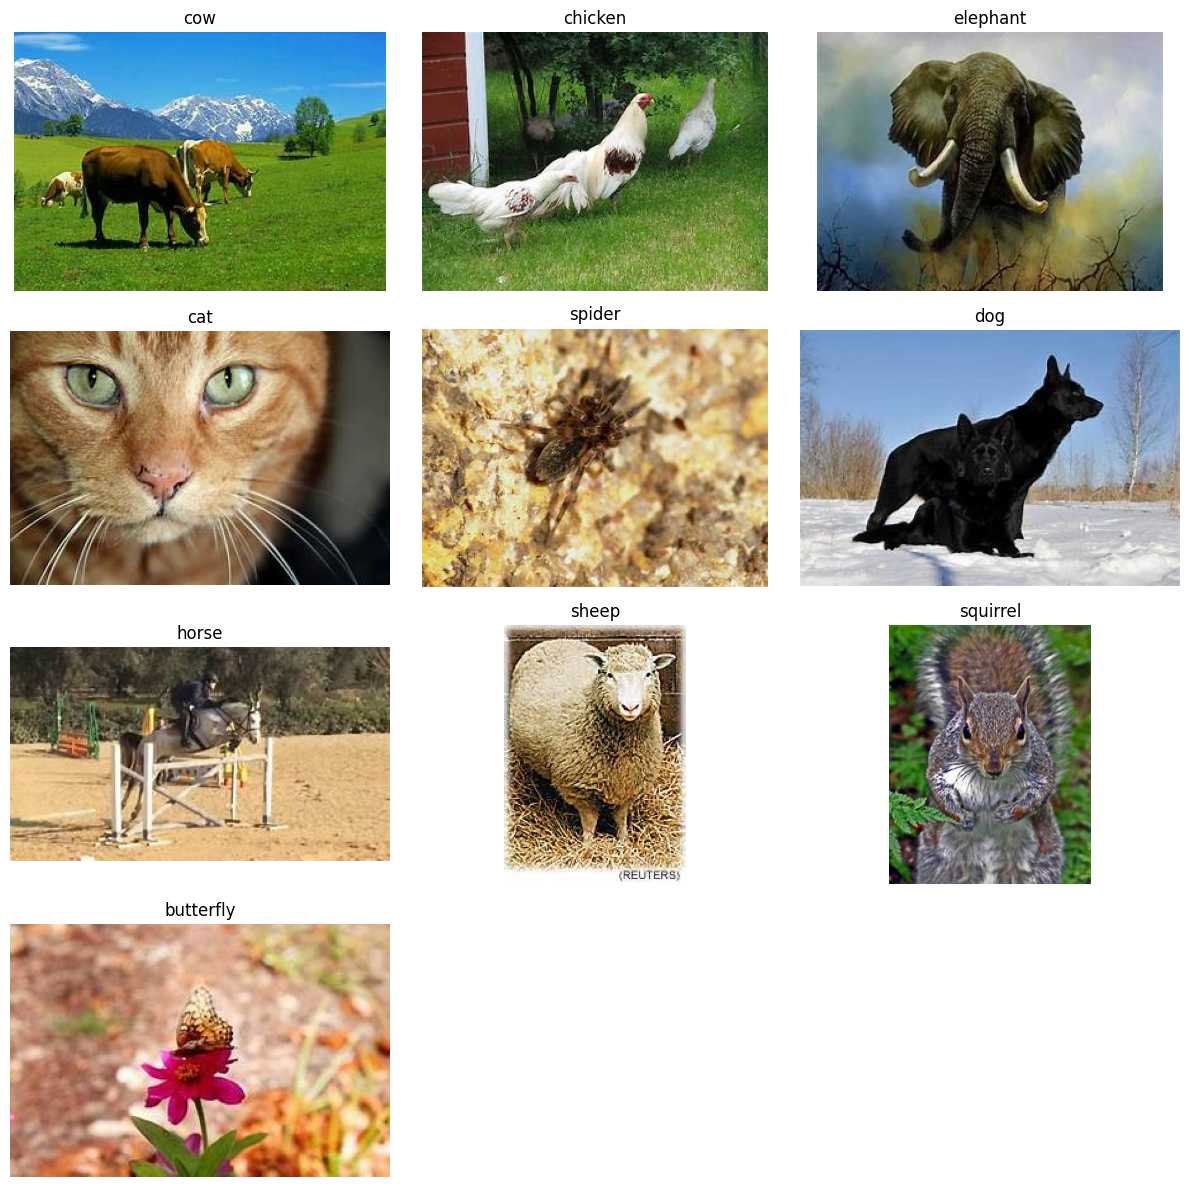

In [ ]:
from PIL import Image

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", 
             "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", 
             "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", 
             "ragno": "spider", "squirrel": "scoiattolo"}


axes = axes.flatten()


for i, (clase, path) in enumerate(first_item.items()):
    img = Image.open(path)
    
    clase = translate[clase]
    axes[i].imshow(img)
    axes[i].set_title(clase, fontsize=12)
    axes[i].axis('off')

for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
class_names = sorted(new_data.keys())
label_map   = {cls:i for i,cls in enumerate(class_names)}


{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [124]:
paths   = []
labels  = []
for cls, lst in new_data.items():
    paths.extend(str(lst))
    labels.extend([label_map[cls]] * len(lst))
    


In [125]:
paths  = tf.constant(paths)                 # dtype=tf.string
labels = tf.constant(labels, dtype=tf.int32)
